# Code for generating figures 

for Fringe around a Beet Slice: Wetting-induced Dimple in a Thin Liquid Film

## 0 Packages

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
from myimagelib.myImageLib import bestcolor, readdata
from scipy.signal import medfilt
from skimage import io
from scipy.ndimage import gaussian_filter1d
from scipy.signal import butter, filtfilt, argrelextrema, argrelmax, find_peaks
from IPython.display import clear_output
from scipy.interpolate import interp1d
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import FormatStrFormatter
from scipy.optimize import curve_fit
from scipy.special import erf
from functools import partial
import matplotlib
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams["xtick.direction"] = "in"
matplotlib.rcParams["ytick.direction"] = "in"
plt.rcParams['xtick.major.size'] = 2  # Length of major ticks
plt.rcParams['ytick.major.size'] = 2  # Length of major ticks
plt.rcParams['xtick.minor.size'] = 1  # Length of minor ticks
plt.rcParams['ytick.minor.size'] = 1  # Length of minor ticks

mc_lut = {
    "water": {
        "color": [
            0.12156862745098039,
            0.4666666666666667,
            0.7058823529411765,
            1.0
        ],
        "marker": "o"
    },
    "beet": {
        "color": [
            1.0,
            0.4980392156862745,
            0.054901960784313725,
            1.0
        ],
        "marker": "s"
    },
    "vinegar": {
        "color": [
            0.8392156862745098,
            0.15294117647058825,
            0.1568627450980392,
            1.0
        ],
        "marker": "v"
    },
    "gw20": {
        "color": [
            0.5490196078431373,
            0.33725490196078434,
            0.29411764705882354,
            1.0
        ],
        "marker": "^"
    },
    "gw40": {
        "color": [
            0.8901960784313725,
            0.4666666666666667,
            0.7607843137254902,
            1.0
        ],
        "marker": "*"
    },
    "gw60": {
        "color": [
            0.7372549019607844,
            0.7411764705882353,
            0.13333333333333333,
            1.0
        ],
        "marker": "p"
    },
    "gw80": {
        "color": [
            0.09019607843137255,
            0.7450980392156863,
            0.8117647058823529,
            1.0
        ],
        "marker": "d"
    }
}

## 1 Figure 3

Thin film surface profiles after the contact with beet slice at $t\approx 10\;\mathrm{s}$.

(0.0, 0.8)

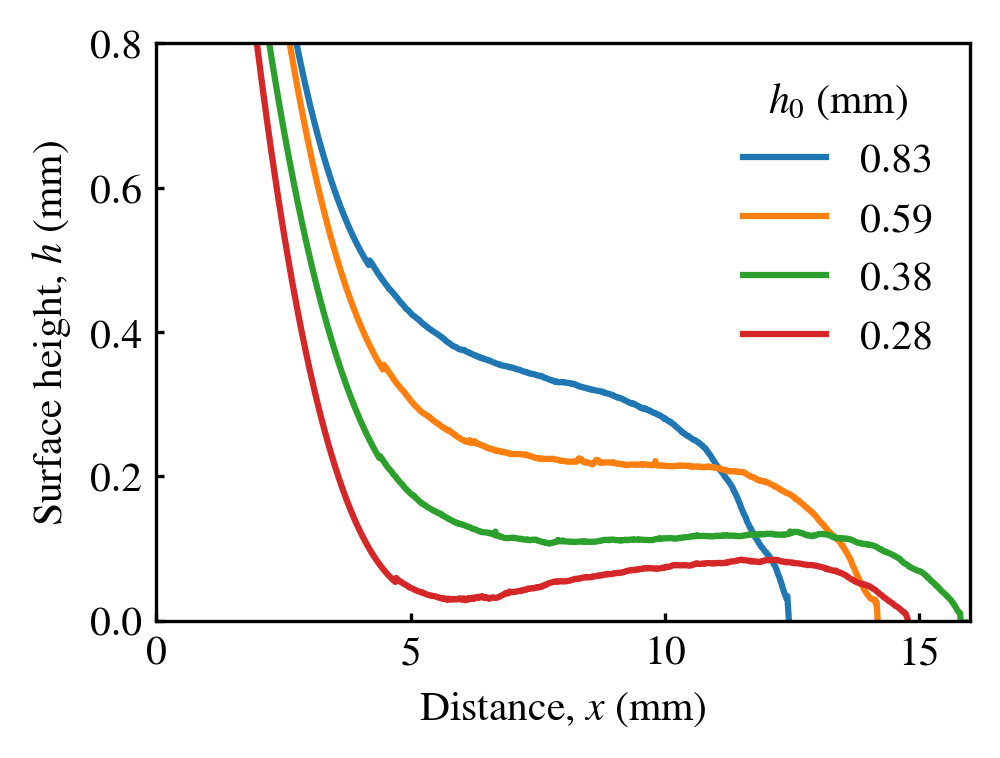

In [5]:
folder = "fig3"
h0s = [0.83, 0.59, 0.38, 0.28]
fig, ax = plt.subplots(figsize=(3.5,2.5), dpi=300)
for h0 in h0s:
    f = f"h0={h0:.2f}.csv"
    df = pd.read_csv(os.path.join(folder, f)).set_index("x")
    tn = df.iloc[:, 0].mean()
    ax.plot(df.index, df.iloc[:,-1], label=f"{tn:.2f}")
ax.legend(frameon=False, title="$h_0$ (mm)")
ax.set_xlabel("Distance, $x$ (mm)")
ax.set_ylabel("Surface height, $h$ (mm)")
ax.set_xlim([0, 16])
ax.set_ylim([0, 0.8])

## 2 Figure 4

 Surface profile measurement and dimple formation process.
(a) Direct dimple formation observation.
(b) Conceptual picture of dimple formation. A dimple forms due to the contact line rising upon the solid-liquid contact.
(c) The fates of a dimple. In a thick film, a dimple gets smoothed out quickly, while in a thin film, a dimple lasts longer. 
(d-e) Surface evolutions of a thick film $h_0=0.66\;\mathrm{mm}$ and a thin film $h_0=0.30\;\mathrm{mm}$. The area shaded in gray indicates the extrapolated surface profile near the meniscus.
The inset of (e) shows the zoom-in view of the surface in the red dashed box.

### Fig.4(c) and 4(d)

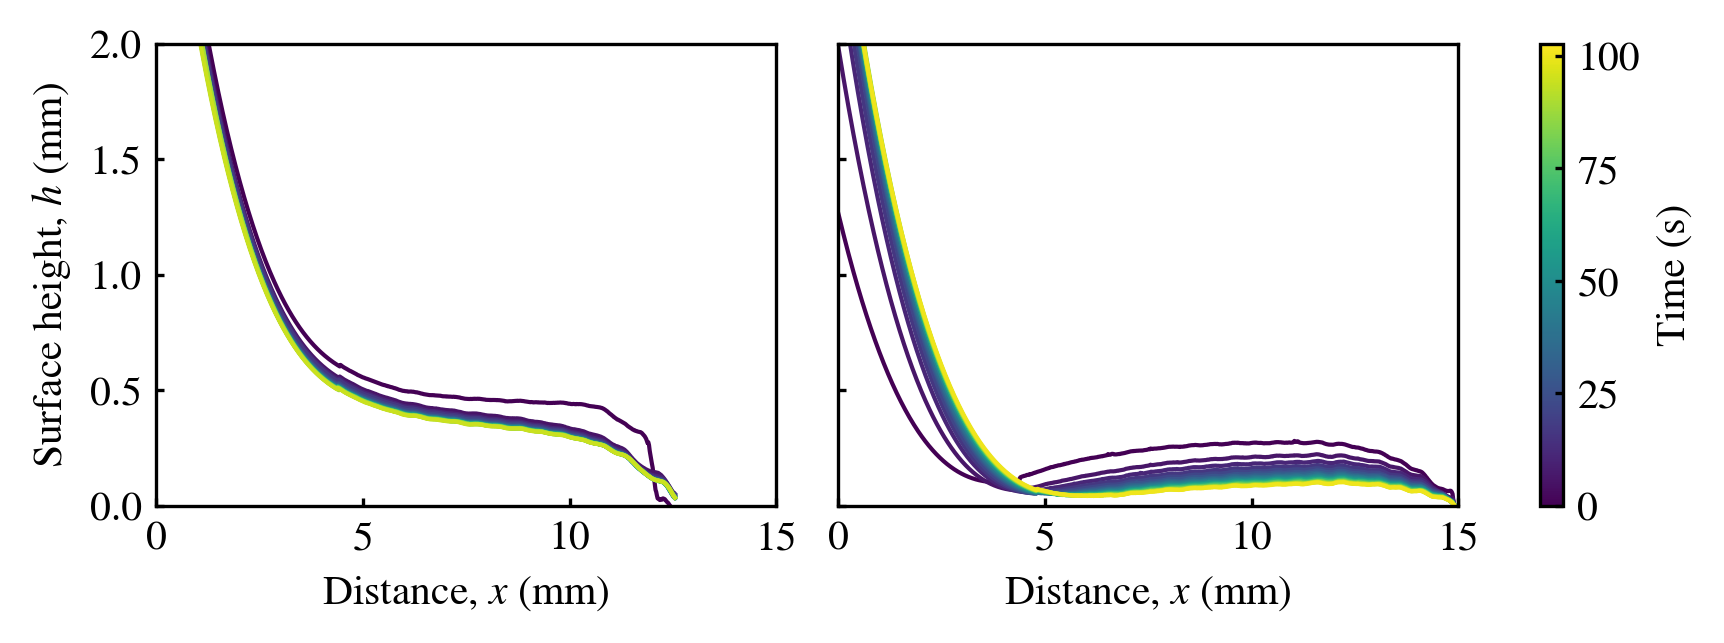

In [6]:
folder = "fig4"
thick = pd.read_csv(os.path.join(folder, "h0=0.66.csv")).set_index("x")
thin = pd.read_csv(os.path.join(folder, "h0=0.30.csv")).set_index("x")
fig, ax = plt.subplots(ncols=2, figsize=(7,2), dpi=300, sharex=True, sharey=True, gridspec_kw={"wspace":0.1})
cmap = plt.get_cmap("viridis")
tmax = float(thin.columns[-1])
for kw in thick.columns[::2]:
    h = thick[kw].values
    x = thick.index.values
    ax[0].plot(thick.index, thick[kw], color=cmap(float(kw)/tmax), lw=1)
    ax[0].set_xlim([0, 15])
    ax[0].set_ylim([0, 2])
    ax[0].set_xlabel("Distance, $x$ (mm)")
    ax[0].set_ylabel("Surface height, $h$ (mm)")
for kw in thin.columns[::2]:
    h = thin[kw].values
    x = thick.index.values
    ax[1].plot(thin.index, thin[kw], color=cmap(float(kw)/tmax), lw=1)
    ax[1].set_xlim([0, 15])
    ax[1].set_ylim([0, 2])
    ax[1].set_xticks([0,5,10,15])
    ax[1].set_yticks([0, 0.5, 1, 1.5, 2])
    ax[1].set_xlabel("Distance, $x$ (mm)")
# add a colorbar to the plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=tmax))
plt.colorbar(sm, ax=ax, label="Time (s)")

### Fig.4(d) inset

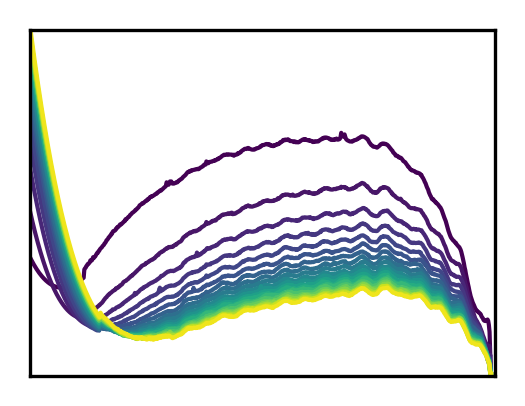

In [13]:
folder = "fig4"
df = pd.read_csv(os.path.join(folder, "h0=0.30.csv")).set_index("x")
count = 0
fig, ax = plt.subplots(figsize=(2, 1.5), dpi=300)
cmap = plt.get_cmap("viridis")
tmax = float(df.columns[-1])

for kw in df.columns[::2]:
    ax.plot(df.index, df[kw], color=cmap(float(kw)/tmax), lw=1)
    ax.set_xlim([3, 15])
    ax.set_ylim([0, .4])
    ax.set_xticks([])
    ax.set_yticks([])


## 3 Figure 5

Theoretical model and numerical solutions.
(a-b) Experimental and simulated temporal evolution of a thin beet juice film of $h_0=0.21$ mm. The dimples and film apexes of each surface profile are indicated as blue and red dots, respectively.
(c) Height ratio temporal evolution for $h_0=0.33,\,0.30,\,0.21\;\mathrm{mm}$ from both experiment (solid) and simulation (hollow) of beet juice.
(d) Dimple time $t_{\mathrm{dimple}}$ at various initial film thickness $h_0\in[0.2,0.6]$ (mm), measured in various liquids, from both experiment (solid) and simulation (hollow).
"gw60" and "gw80" stands for glycerol-water mixture with 60\% and 80\% of glycerol, respectively, by weight.
The $t_{\mathrm{dimple}}\sim h_0^{-9}$ scaling is indicated with the black triangle.
The inset shows the rescaled dimple time $t_{\mathrm{dimple}}/\tau$ as a function of initial thickness $h_0$.

### Fig.5(a)

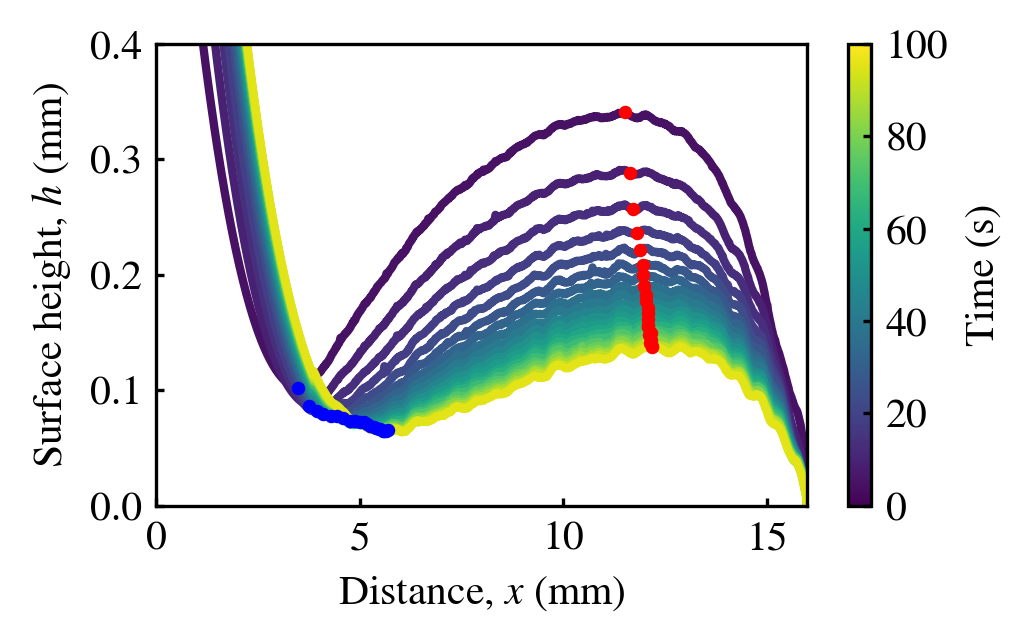

In [16]:
folder = "fig5"
df = pd.read_csv(os.path.join(folder, "h0=0.21_exp.csv")).set_index("x")
dimple = pd.read_csv(os.path.join(folder, "h0=0.21_exp_dimple.csv"))

fig, ax = plt.subplots(figsize=(3.5, 2), dpi=300)
down_sample = 2
cmap = plt.get_cmap("viridis")
tmax = float(df.columns[-1])
n_curves = df.shape[1]
for i in range(2, n_curves-1, down_sample):
    # read surface profile data for smoothing purpose
    x, y = df.index, df.iloc[:, i].values
    ax.plot(x, y, color=cmap(i/n_curves), lw=2)
    min_ind = dimple.loc[i//2, "minima_index"]
    max_ind = dimple.loc[i//2, "maxima_index"]
    if np.isnan(min_ind) or np.isnan(max_ind):
        continue
    ax.scatter(x[int(min_ind)], dimple.loc[i//2, "minima"], color="blue", s=5, zorder=10)
    ax.scatter(x[int(max_ind)], dimple.loc[i//2, "maxima"], color="red", s=5, zorder=10)

ax.set_xlim([0, 16])
ax.set_ylim([0, 0.4])
ax.set_xlabel("Distance, $x$ (mm)")
ax.set_ylabel("Surface height, $h$ (mm)")

# add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=100))
plt.colorbar(sm, ax=ax, label="Time (s)")

### Fig.5(b)

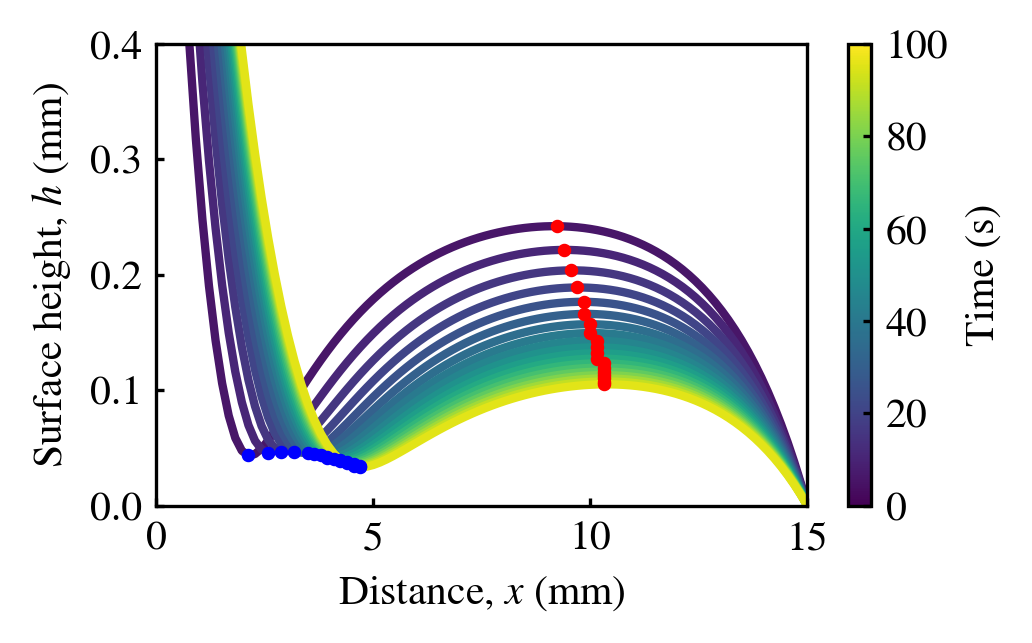

In [17]:
folder = "fig5"
df = pd.read_csv(os.path.join(folder, "h0=0.21_sim.csv")).set_index("x")
dimple = pd.read_csv(os.path.join(folder, "h0=0.21_sim_dimple.csv"))

fig, ax = plt.subplots(figsize=(3.5, 2), dpi=300)
down_sample = 50
cmap = plt.get_cmap("viridis")
tmax = 100
for i in range(57, 1000, down_sample):
    # read surface profile data for smoothing purpose
    x, y = df.index, df.iloc[:, i].values
    ax.plot(x, y, color=cmap(i/1000), lw=2)
    min_ind = dimple.loc[i, "minima_index"]
    max_ind = dimple.loc[i, "maxima_index"]
    if np.isnan(min_ind) or np.isnan(max_ind):
        continue
    ax.scatter(x[int(min_ind)], dimple.loc[i, "minima"], color="blue", s=5, zorder=10)
    ax.scatter(x[int(max_ind)], dimple.loc[i, "maxima"], color="red", s=5, zorder=10)

ax.set_xlim([0, df.index[-1]])
ax.set_ylim([0, 0.4])
ax.set_xlabel("Distance, $x$ (mm)")
ax.set_ylabel("Surface height, $h$ (mm)")

# add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=tmax))
plt.colorbar(sm, ax=ax, label="Time (s)")

### Fig.5(c)

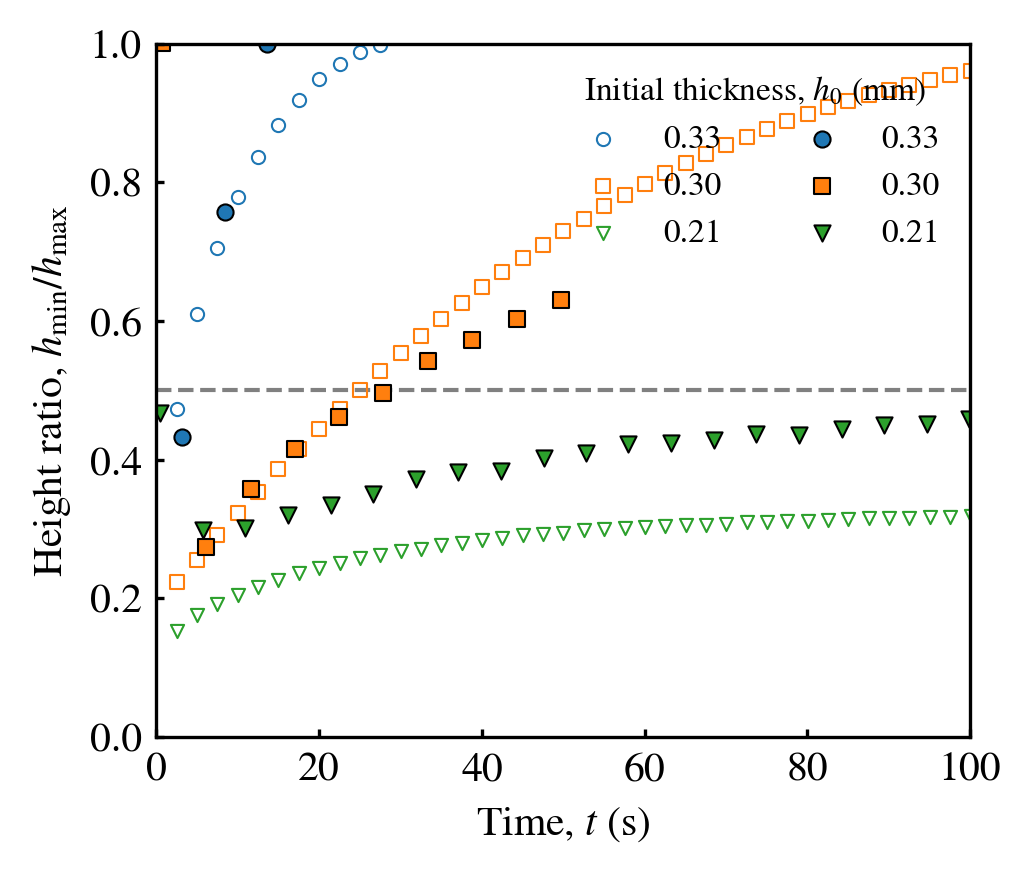

In [2]:
# read dimple data
initial_thickness = [.33, .3, .21]
folder = "fig5"
markers = ["o", "s", "v", "^"]
fig, ax = plt.subplots(figsize=(3.5,3), dpi=300)
cmap = plt.get_cmap("tab10")
for i, h0 in enumerate(initial_thickness):
    dimple = pd.read_csv(os.path.join(folder, f"h0={h0:.2f}_sim_dimple.csv"))[0::25]
    ax.scatter(dimple["t"], dimple["minima"] / dimple["maxima"], 
                lw=0.5, marker=markers[i], s=10,
                facecolor=(0,0,0,0), edgecolor=cmap(i), 
                label="{:.2f}".format(initial_thickness[i]))
for i, h0 in enumerate(initial_thickness):
    dimple_exp = pd.read_csv(os.path.join(folder, f"h0={h0:.2f}_exp_dimple.csv"))
    ax.scatter(dimple_exp["t"], dimple_exp["minima"] / dimple_exp["maxima"], 
                marker=markers[i], s=15, lw=0.5,
                facecolor=cmap(i), edgecolor="black", 
                label="{:.2f}".format(initial_thickness[i]))
ax.legend(frameon=False, fontsize=8, loc="upper right", title="Initial thickness, $h_0$ (mm)", ncol=2, title_fontsize=8)
ax.set_xlabel("Time, $t$ (s)")
ax.set_ylabel("Height ratio, $h_\mathrm{min}/h_\mathrm{max}$")
ax.set_xlim([0, 100])
ax.set_ylim([0, 1])
# plot a line at y = 0.5
ax.axhline(0.5, color="gray", ls="--", lw=1, zorder=-10)

### Fig.5(d)

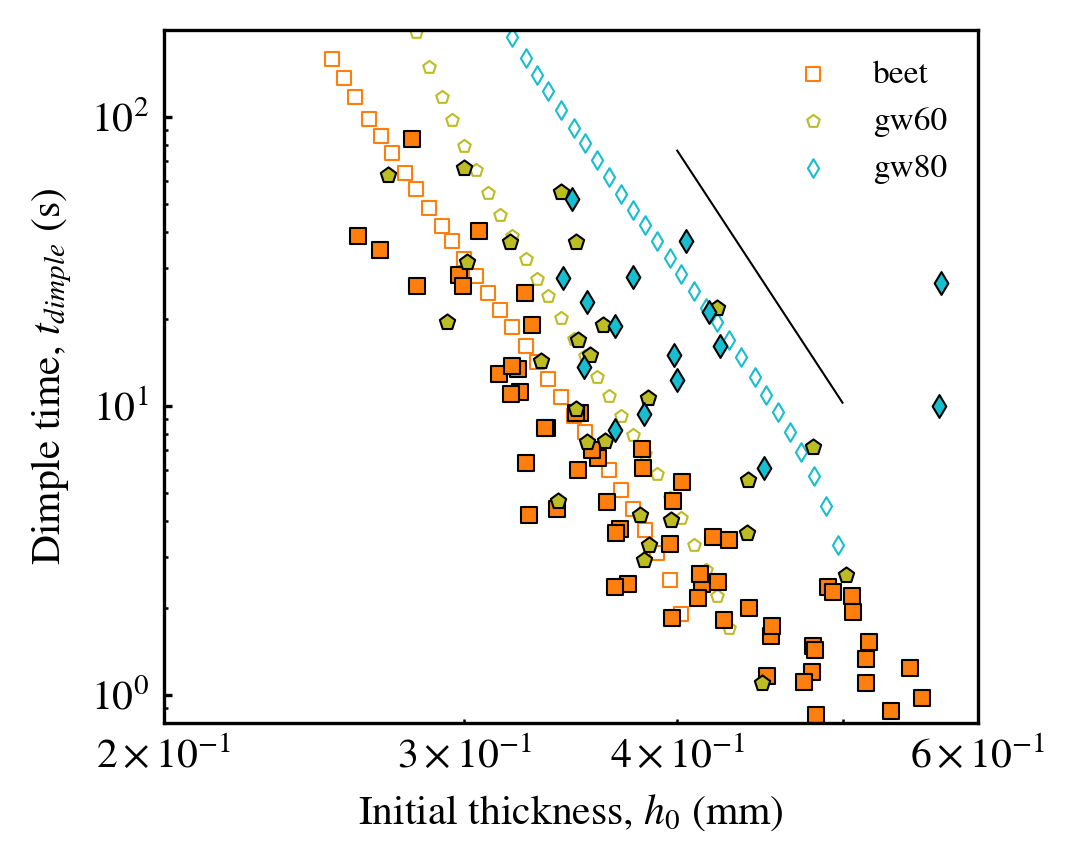

In [7]:
folder = "fig5"
dimple_time = pd.read_csv(os.path.join(folder, "dimple_time_sim.csv"))
# filter out the data where dimple time is not accurately detected
dimple_time = dimple_time.loc[(dimple_time["t"] < 200)&(dimple_time["h0"] > 25e-5)]
dimple_time.sort_values("mu", inplace=True)


liquids = ["beet", "gw60", "gw80"]
cmap = plt.get_cmap("tab10")
colors = [cmap(i) for i in [1, 8, 9]]
markers = ["s", "p", "d"]
cm_map = pd.DataFrame({"color": colors, "marker": markers}, index=liquids)

fig, ax = plt.subplots(figsize=(3.5, 3), dpi=300)
for liquid, i in cm_map.iterrows():
    g = dimple_time.loc[dimple_time["liquid"] == liquid]
    ax.scatter(g["h0"]*1e3, g["t"], 
               s=10, lw=.5, marker=i.marker, facecolor=(0,0,0,0), 
               edgecolor=i.color, label=f"{liquid}")
ax.loglog()

ax.set_xlabel("Initial thickness, $h_0$ (mm)")
ax.set_ylabel("Dimple time, $t_{dimple}$ (s)")

ax.set_xlim([0.2, .6])
ax.set_ylim([.8, 200])
ax.legend(frameon=False, fontsize=8, loc="upper right", ncol=1)

# experimental data
dimple_exp = pd.read_csv(os.path.join(folder, "dimple_time_exp.csv"))
dimple_exp = dimple_exp.loc[dimple_exp["t"] < 100]
liquids = dimple_exp["liquid"].unique()
for liquid, i in cm_map.iterrows():
    g = dimple_exp.loc[dimple_exp["liquid"] == liquid]
    ax.scatter(g["h0ext"], g["t"], 
               s=15, lw=.5, marker=i.marker, 
               facecolor=i.color, edgecolor="black", label=f"{liquid}")

# power law line
x = np.linspace(0.4, 0.5, 100)
y = x**-9 / 50
plt.plot(x, y, color="black", ls="-", lw=.5)

### Fig.5(e)

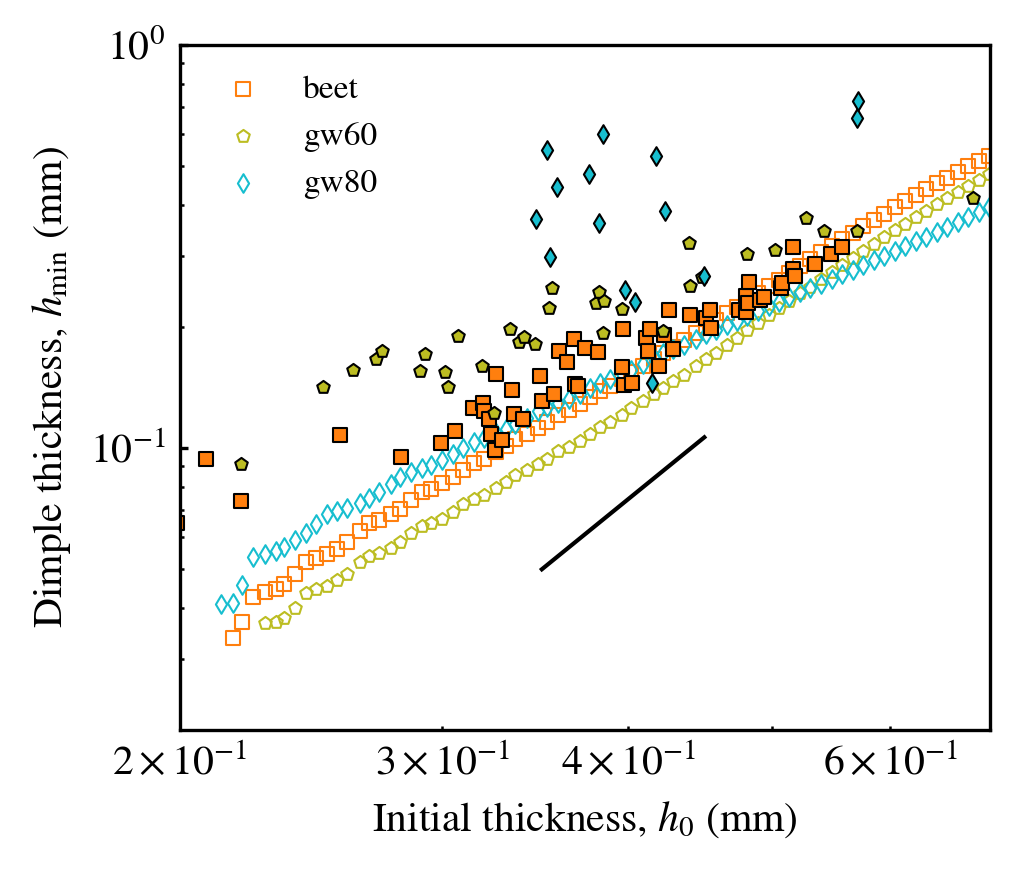

In [25]:
folder = "fig5"
df_sim = pd.read_csv(os.path.join(folder, "h_h0_sim_t0.5.csv"))
df_exp = pd.read_csv(os.path.join(folder, "h_h0_exp_t0.5.csv"))

fig, ax = plt.subplots(figsize=(3.5, 3), dpi=300)

for liquid, g in df_sim.groupby("liquid"):
    if liquid in ["beet", "gw60", "gw80"]:
        ax.scatter(g.h0, g.h, s=10, lw=0.5, edgecolor=mc_lut[liquid]["color"], facecolor=(0,0,0,0), marker=mc_lut[liquid]["marker"], label=liquid)
for liquid, g in df_exp.groupby("liquid"):
    if liquid in ["beet", "gw60", "gw80"]:
        ax.scatter(g.h0, g.h, s=10, lw=0.5, edgecolor="black", facecolor=mc_lut[liquid]["color"], marker=mc_lut[liquid]["marker"])
# scaling guide-eye
x = np.linspace(.35, .45)
# y = 1*x**2.5
# y = y / y[0] * 0.05
# ax.plot(x, y, color="black", ls="-", lw=1)
# y = 1*x**2
# y = y / y[0] * 0.05
# ax.plot(x, y, color="black", ls="-", lw=1)
y = 1*x**3
y = y / y[0] * 0.05
ax.plot(x, y, color="black", ls="-", lw=1)
ax.legend(frameon=False, fontsize=8)

ax.set_xlabel("Initial thickness, $h_0$ (mm)")
ax.set_ylabel("Dimple thickness, $h_\mathrm{min}$ (mm)")
ax.set_xlim([.2, .7])
ax.set_ylim([.02, 1])
ax.loglog()
ax.legend(frameon=False, fontsize=8)
plt.tight_layout()

### Fig.5(f)

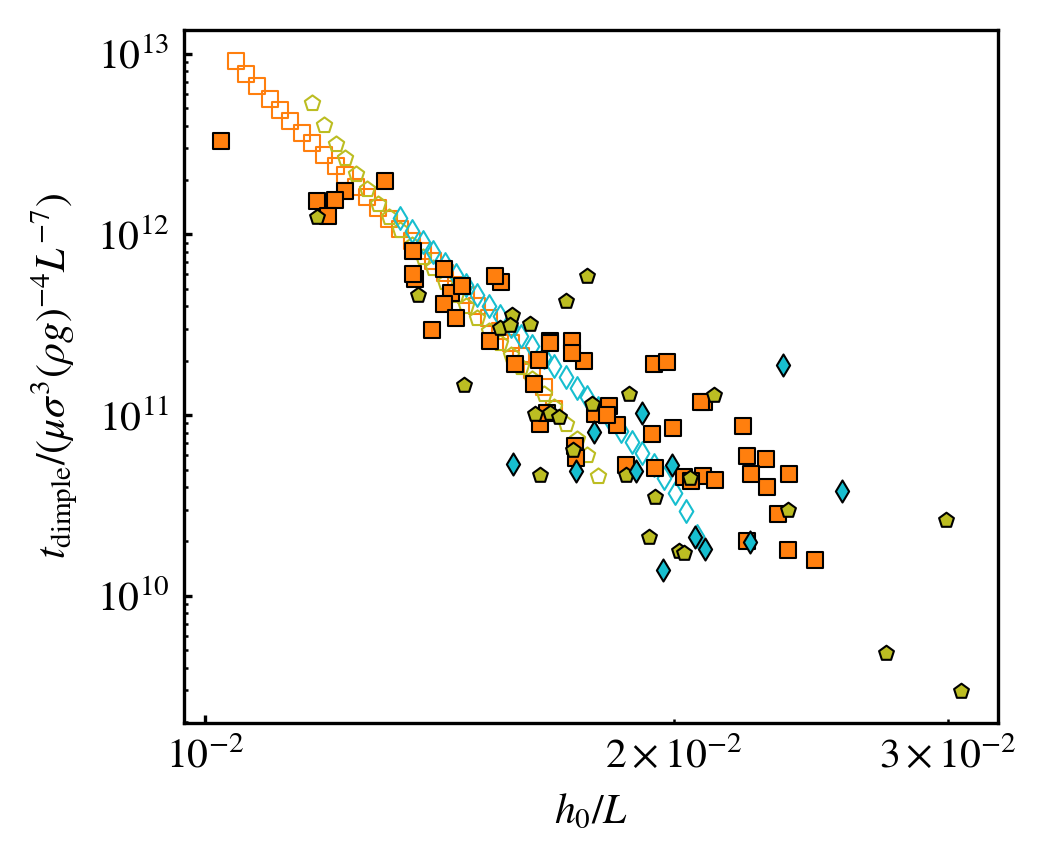

In [16]:
folder = "fig5"
dimple_time = pd.read_csv(os.path.join(folder, "dimple_time_sim.csv"))
dimple_time = dimple_time.loc[(dimple_time["t"] < 200)&(dimple_time["h0"] > 25e-5)]
dimple_time.sort_values("mu", inplace=True)
fig, ax = plt.subplots(figsize=(3.5, 3), dpi=300)

liquids = ["beet", "gw60", "gw80"]
cmap = plt.get_cmap("tab10")
colors = [cmap(i) for i in [1, 8, 9]]
markers = ["s", "p", "d"]
viscosity_list = [10e-3, 10.5e-3, 58e-3]
st_list = [42e-3, 64e-3, 62e-3]
rho_list = [1e3, 1.1533e3, 1.2079e3]
cm_map = pd.DataFrame({"mu": viscosity_list, 
                       "sigma": st_list, 
                       "rho": rho_list,
                       "color": colors,
                       "marker": markers}, index=liquids)

for liquid, i in cm_map.iterrows():
    g = dimple_time.loc[dimple_time["liquid"] == liquid]
    tau = i["mu"] * i["sigma"]**3 * (i["rho"]*9.8)**-4 * (g["L"])**-7 
    ax.scatter(g["h0"]/g["L"], g["t"]/tau, 
               s=15, lw=.5, marker=i.marker, facecolor=(0,0,0,0), 
               edgecolor=i.color, label=f"{liquid}")
ax.loglog()
ax.set_xlabel("$h_0/L$")
ax.set_ylabel("$t_{\mathrm{dimple}}/(\mu\sigma^3(\\rho g)^{-4}L^{-7})$")
# ax.set_xlim([0.2, .8])

# experimental data
dimple_exp = pd.read_csv(os.path.join(folder, "dimple_time_exp.csv"))
dimple_exp = dimple_exp.loc[(dimple_exp["t"] < 100)&(dimple_exp["L"]>18)]
liquids = dimple_exp["liquid"].unique()
for liquid, i in cm_map.iterrows():
    g = dimple_exp.loc[dimple_exp["liquid"] == liquid]
    tau = i["mu"] * i["sigma"]**3 * (i["rho"]*9.8)**-4 * (g["L"]*1e-3)**-7 
    ax.scatter(g["h0ext"]/g["L"], g["t"]/tau, 
               s=14, lw=.5, marker=i.marker, 
               facecolor=i.color, edgecolor="black", label=f"{liquid}")